<a href="https://colab.research.google.com/github/tahminahasan/Workflow-ML/blob/main/Feature_Scaling_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Scaling - Standardization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.shape

(400, 5)

In [ ]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [ ]:
df=df.iloc[:,2:]

df.iloc is used for integer-location-based indexing in Pandas.

: means select all rows.

2: means select all columns starting from index 2 to the end.

So this line: Removes the first two columns of the DataFrame and keeps the rest.

In [ ]:
df.shape

(400, 3)

In [ ]:
df.sample(3)

,Age,EstimatedSalary,Purchased
57,28,79000,0
22,48,41000,1
307,47,113000,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

df.drop('Purchased', axis=1)
→ Drops the 'Purchased' column from df and gives you the features (X).

df['Purchased']
→ Selects the target variable (y) — in this case, whether someone made a purchase.

random_state=0
Ensures the split is reproducible — same split every time you run it.

Standard Scaler

In [ ]:
#Imports the StandardScaler, which standardizes features by removing the mean and scaling to unit variance (i.e., mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

#Creates a StandardScaler object
scaler= StandardScaler()

# Learns the mean and standard deviation from the training data only (very important for avoiding data leakage). fit() is done on training data only.
scaler.fit(X_train)

#Applies the learned scaling to the training data
X_train_scaled=scaler.transform(X_train)

#Applies the same scaling to the test data using the training data's parameters
X_test_scaled=scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [ ]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
#Convert the NumPy arrays (X_train_scaled, X_test_scaled) back to DataFrames
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

When you scale:
X_train_scaled = scaler.transform(X_train)

X_train_scaled becomes a NumPy array.
It loses column names and index — it's just numbers.

Why convert back to DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

Column Names Are Useful
You can See which feature you're working with
Do analysis or plotting with named columns


In [ ]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [ ]:
#for original'
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
#for scaled (mean 0, std 1)
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

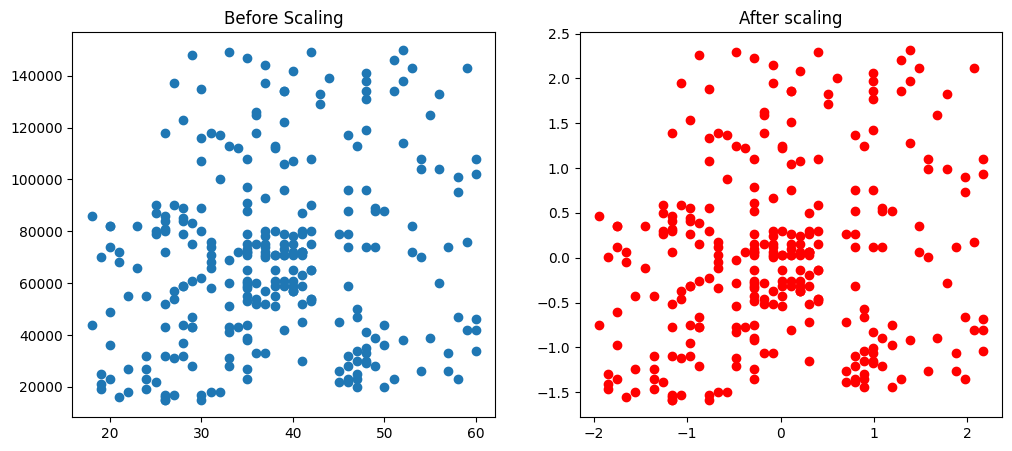

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After scaling')
plt.show()

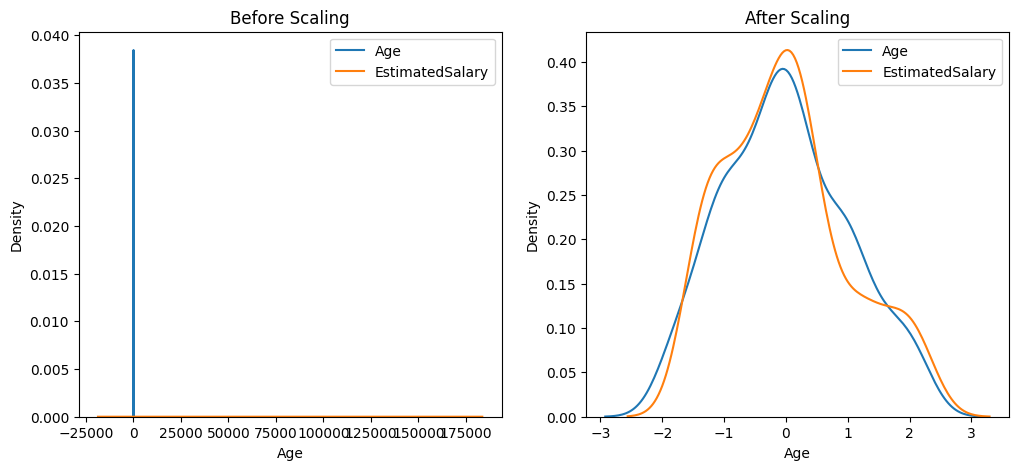

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize= (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')
ax1.legend()

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
ax2.legend()

plt.show()

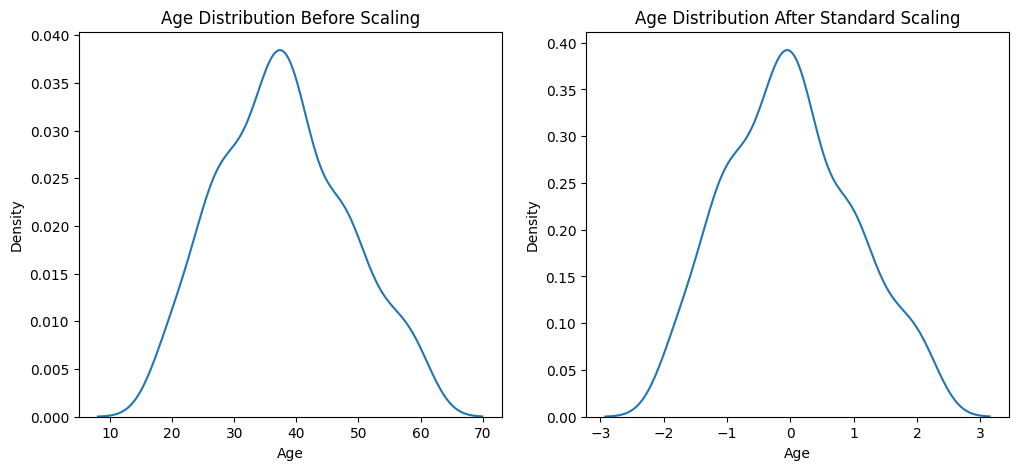

In [ ]:
#Comparison of Distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

Why scaling is important?


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
svm = SVC(kernel='rbf', random_state=0)            # On unscaled data (usually not recommended)
svm_scaled = SVC(kernel='rbf', random_state=0)     # On scaled data (recommended)

# Fit the models
svm.fit(X_train, y_train)
svm_scaled.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_pred_svm_scaled = svm_scaled.predict(X_test_scaled)

# Accuracy
print("SVM Actual (unscaled):", accuracy_score(y_test, y_pred_svm))
print("SVM Scaled:", accuracy_score(y_test, y_pred_svm_scaled))


SVM Actual (unscaled): 0.7916666666666666
SVM Scaled: 0.9083333333333333


Must use standardization in K-means, KNN, PCA, ANN, Gradient Descent